In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from loadData import load
from neuralNetwork import neuralNetworkTrain
from neuralNetwork import neuralNetworkEvaluate
from sklearn.neural_network import MLPClassifier

%matplotlib inline

/Users/msamuel/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/msamuel/Projects/scikit-learn/sklearn/cross_validation.py:42: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
x = []
trainClassificationErrors = []
testClassificationErrors = []
trainCEErrors = []
testCEErrors = []
models = []

trainData, trainLabels, testData, testLabels = load()
for numHiddenNodes in xrange(5, 500, 5):
    print "Handling " + str(numHiddenNodes) + " nodes"
    model = neuralNetworkTrain(trainData, trainLabels, numHiddenNodes)
    models.append(model)

    trainClassificationError = neuralNetworkEvaluate(model, trainData, trainLabels)
    testClassificationError = neuralNetworkEvaluate(model, testData, testLabels)
    
    trainCEError = np.sum(model.predict_log_proba(trainData))
    testCEError = np.sum(model.predict_log_proba(testData))

    x.append(numHiddenNodes)
    trainClassificationErrors.append(trainClassificationError)
    testClassificationErrors.append(testClassificationError)
    trainCEErrors.append(trainCEError)
    testCEErrors.append(testCEError)

Handling 5 nodes
Handling 10 nodes
Handling 15 nodes
Handling 20 nodes
Handling 25 nodes
Handling 30 nodes
Handling 35 nodes
Handling 40 nodes
Handling 45 nodes
Handling 50 nodes
Handling 55 nodes
Handling 60 nodes
Handling 65 nodes
Handling 70 nodes
Handling 75 nodes
Handling 80 nodes
Handling 85 nodes
Handling 90 nodes
Handling 95 nodes
Handling 100 nodes
Handling 105 nodes
Handling 110 nodes
Handling 115 nodes
Handling 120 nodes
Handling 125 nodes
Handling 130 nodes
Handling 135 nodes
Handling 140 nodes
Handling 145 nodes
Handling 150 nodes
Handling 155 nodes
Handling 160 nodes
Handling 165 nodes
Handling 170 nodes
Handling 175 nodes
Handling 180 nodes
Handling 185 nodes
Handling 190 nodes
Handling 195 nodes
Handling 200 nodes
Handling 205 nodes
Handling 210 nodes
Handling 215 nodes
Handling 220 nodes
Handling 225 nodes
Handling 230 nodes
Handling 235 nodes
Handling 240 nodes
Handling 245 nodes
Handling 250 nodes
Handling 255 nodes
Handling 260 nodes
Handling 265 nodes
Handling 270 

/Users/msamuel/Projects/scikit-learn/sklearn/neural_network/multilayer_perceptron.py:554: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


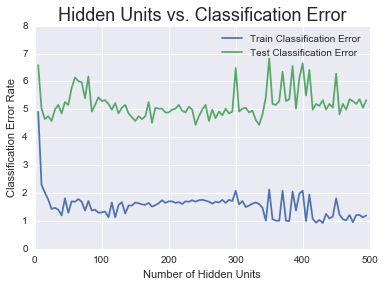

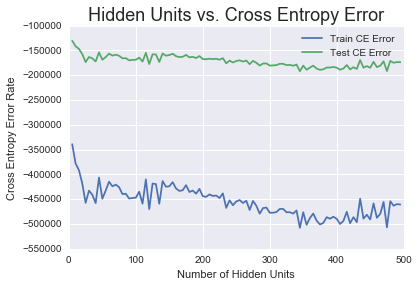

In [5]:
plt.plot(x, trainClassificationErrors, label="Train Classification Error")
plt.plot(x, testClassificationErrors, label="Test Classification Error")
plt.title("Hidden Units vs. Classification Error", fontsize=18)
plt.xlabel("Number of Hidden Units")
plt.ylabel("Classification Error Rate")
plt.legend()
plt.ylim([0,8])
plt.show()

plt.plot(x, trainCEErrors, label="Train CE Error")
plt.plot(x, testCEErrors, label="Test CE Error")
plt.title("Hidden Units vs. Cross Entropy Error", fontsize=18)
plt.xlabel("Number of Hidden Units")
plt.ylabel("Cross Entropy Error Rate")
plt.legend()
plt.show()

### Based on the above graph, we choose an optimal range of hidden node values to further experiment on. Let's say this range is 150-350

In [6]:
xData = []
trainErrorData = []
testErrorData = []
trainCEErrorData = []
testCEErrorData = []

potentialActivations = ["logistic", "tanh", "relu"]
trainData, trainLabels, testData, testLabels = load()
for activationFcn in potentialActivations:
    x = []
    trainErrors = []
    testErrors = []
    trainCEErrors = []
    testCEErrors = []

    for numHiddenNodes in xrange(150, 350, 5):
        model = neuralNetworkTrain(trainData, trainLabels, numHiddenNodes, activationFcn)

        trainError = neuralNetworkEvaluate(model, trainData, trainLabels)
        testError = neuralNetworkEvaluate(model, testData, testLabels)
        
        trainCEError = np.sum(model.predict_log_proba(trainData))
        testCEError = np.sum(model.predict_log_proba(testData))

        x.append(numHiddenNodes)
        trainErrors.append(trainError)
        testErrors.append(testError)
        trainCEErrors.append(trainCEError)
        testCEErrors.append(testCEError)
        
    xData.append(x)
    trainErrorData.append(trainErrors)
    testErrorData.append(testErrors)
    trainCEErrorData.append(trainCEErrors)
    testCEErrorData.append(testCEErrors)

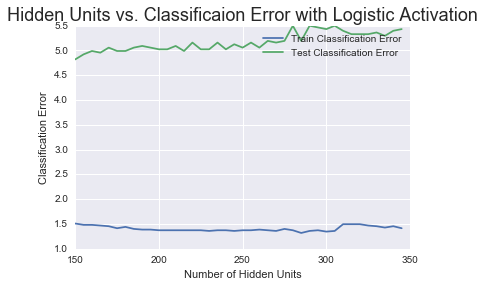

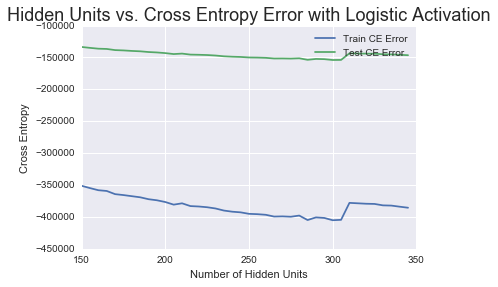

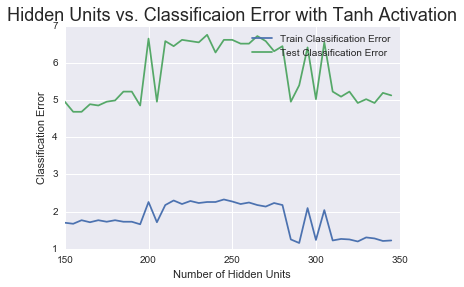

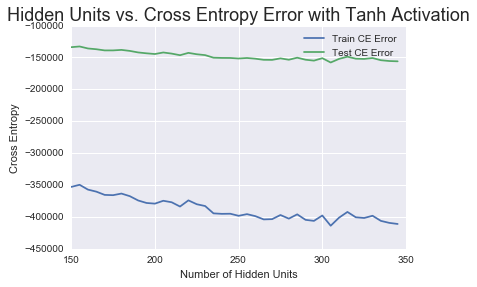

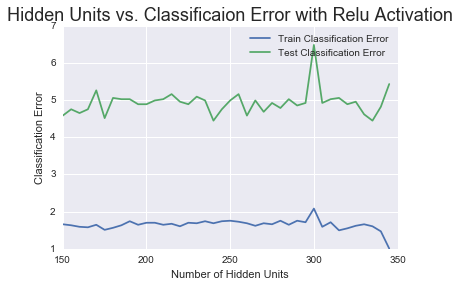

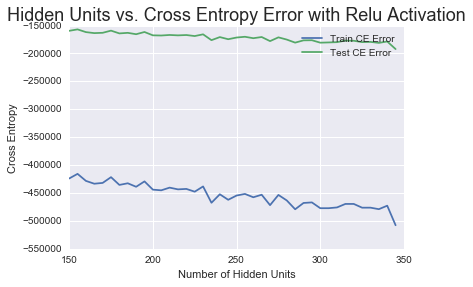

In [7]:
activationFunctions = ["Logistic", "Tanh", "Relu"]
for i in xrange(len(xData)):
    plt.plot(xData[i], trainErrorData[i], label="Train Classification Error")
    plt.plot(xData[i], testErrorData[i], label="Test Classification Error")
    plt.title("Hidden Units vs. Classificaion Error with " + activationFunctions[i] + " Activation", fontsize=18)
    plt.xlabel("Number of Hidden Units")
    plt.ylabel("Classification Error")
    plt.legend()
    plt.show()
    
    plt.plot(xData[i], trainCEErrorData[i], label="Train CE Error")
    plt.plot(xData[i], testCEErrorData[i], label="Test CE Error")
    plt.title("Hidden Units vs. Cross Entropy Error with " + activationFunctions[i] + " Activation", fontsize=18)
    plt.xlabel("Number of Hidden Units")
    plt.ylabel("Cross Entropy")
    plt.legend()
    plt.show()

### Again, based on these graphs, we see the most stable results using a logistic activation function. We'll now try using logistic activation over the entire initial range of hidden nodes to see if we find a different optimal value.

In [ ]:
x = []
trainErrors = []
testErrors = []
models = []

trainData, trainLabels, testData, testLabels = load()
for numHiddenNodes in xrange(5, 500, 5):
    model = neuralNetworkTrain(trainData, trainLabels, numHiddenNodes, "logistic")
    models.append(model)

    trainError = neuralNetworkEvaluate(model, trainData, trainLabels)
    testError = neuralNetworkEvaluate(model, testData, testLabels)

    x.append(numHiddenNodes)
    trainErrors.append(trainError)
    testErrors.append(testError)

In [ ]:
plt.plot(x, trainErrors, label="Train Error")
plt.plot(x, testErrors, label="Test Error")
plt.title("Hidden Units vs. Error Rate", fontsize=18)
plt.xlabel("Number of Hidden Units")
plt.ylabel("Error Rate")
plt.legend()
plt.show()

### We can probably narrow down the minimum rate to the range 150 to 250 hidden units. Now let's see what learning rates work best

In [ ]:
xData = []
trainErrorData = []
testErrorData = []

learningRates = [0.1, 0.01, 0.001, 0.0001]
trainData, trainLabels, testData, testLabels = load()
for learningRate in learningRates:
    x = []
    trainErrors = []
    testErrors = []

    for numHiddenNodes in xrange(150, 250, 5):
        model = neuralNetworkTrain(trainData, trainLabels, numHiddenNodes, "logistic", learningRate)

        trainError = neuralNetworkEvaluate(model, trainData, trainLabels)
        testError = neuralNetworkEvaluate(model, testData, testLabels)

        x.append(numHiddenNodes)
        trainErrors.append(trainError)
        testErrors.append(testError)
        
    xData.append(x)
    trainErrorData.append(trainErrors)
    testErrorData.append(testErrors)

In [ ]:
for i in xrange(len(xData)):
    plt.plot(xData[i], trainErrorData[i], label="Train Error")
    plt.plot(xData[i], testErrorData[i], label="Test Error")
    plt.title("Hidden Units vs. Error Rate with " + str(learningRates[i]) + " Learning Rate", fontsize=18)
    plt.xlabel("Number of Hidden Units")
    plt.ylabel("Error Rate")
    plt.legend()
    plt.show()

In [ ]:
xData = []
trainErrorData = []
testErrorData = []

regularizations = [0.1, 0.01, 0.001, 0.0001]
trainData, trainLabels, testData, testLabels = load()
for reg in regularizations:
    x = []
    trainErrors = []
    testErrors = []

    for numHiddenNodes in xrange(150, 250, 5):
        model = neuralNetworkTrain(trainData, trainLabels, numHiddenNodes, "logistic", 0.0001, reg)

        trainError = neuralNetworkEvaluate(model, trainData, trainLabels)
        testError = neuralNetworkEvaluate(model, testData, testLabels)

        x.append(numHiddenNodes)
        trainErrors.append(trainError)
        testErrors.append(testError)
        
    xData.append(x)
    trainErrorData.append(trainErrors)
    testErrorData.append(testErrors)